In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.DataFrame({'h':[150,160,170,180,300],
                 'w':[50,60,70,80,200]})

In [77]:
mean=df.mean()
std=df.std()
z=(df-mean)/std

In [78]:
z.round(2)

,h,w
0,-0.68,-0.68
1,-0.52,-0.52
2,-0.36,-0.36
3,-0.20,-0.20
4,1.76,1.76


In [79]:
z

,h,w
0,-0.684035,-0.684035
1,-0.521170,-0.521170
2,-0.358304,-0.358304
3,-0.195439,-0.195439
4,1.758948,1.758948


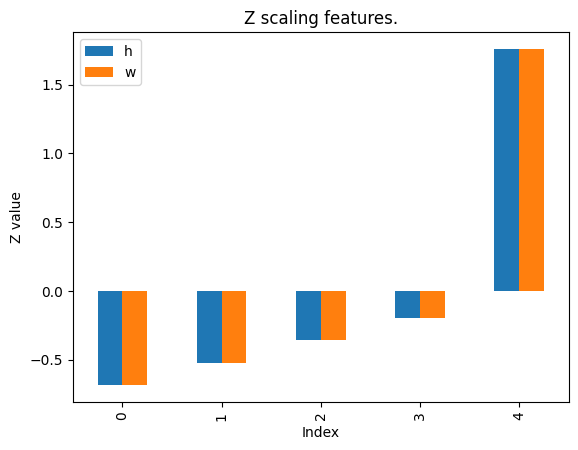

In [80]:
z.plot(kind="bar")
plt.title("Z scaling features.")
plt.xlabel("Index")
plt.ylabel("Z value")
plt.show()

#### Min Max Scaling

In [81]:
df # no outlayers

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


In [82]:
mn=df.min()
mx=df.max()
mn,mx

(h    150
 w     50
 dtype: int64,
 h    300
 w    200
 dtype: int64)

In [83]:
min_max_scaling=(df-mn)/(mx-mn)
min_max_scaling

,h,w
0,0.000000,0.000000
1,0.066667,0.066667
2,0.133333,0.133333
3,0.200000,0.200000
4,1.000000,1.000000


Text(0, 0.5, 'Min Max Scaling')

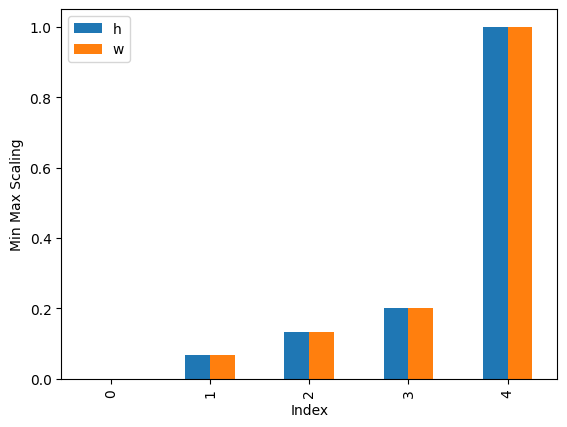

In [84]:
min_max_scaling.plot(kind="bar")
plt.xlabel("Index")
plt.ylabel("Min Max Scaling")

### Robust Scaling:
- If outlayers exist in a dataset.
- Formula=(x-median)/IQR
- IQR=Q3-Q1


In [85]:
median=df.median()
q1=df.quantile(.25) # for 1st quartile
q3=df.quantile(.75)


In [86]:
median,q1,q3

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64)

In [87]:
robust_scaling=(df-median)
robust_scaling=robust_scaling/(q3-q1)

In [88]:
robust_scaling

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


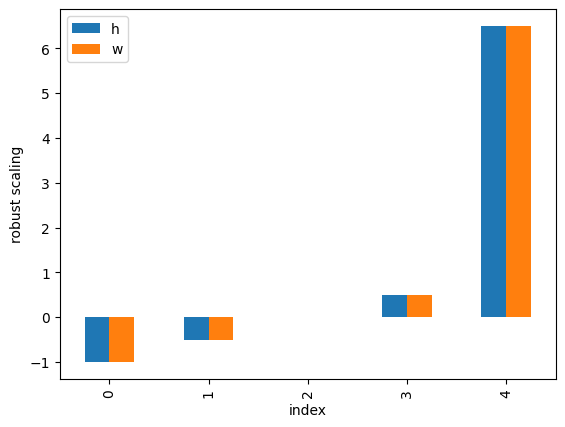

In [89]:
robust_scaling.plot(kind="bar")
plt.xlabel("index")
plt.ylabel("robust scaling")
plt.show()

In [92]:
df=pd.concat([df,z.add_prefix('z_score_'),min_max_scaling.add_prefix('min_max_scaling_'),robust_scaling.add_prefix("robust_scaling_")],axis=1)

In [94]:
df.round(2)

,h,w,z_scoreh,z_scorew,min max scalingh,min max scalingw,robust_scalingh,robust_scalingw,z_score_h,z_score_w,min_max_scaling_h,min_max_scaling_w,robust_scaling_h,robust_scaling_w
0,150,50,-0.68,-0.68,0.00,0.00,-1.0,-1.0,-0.68,-0.68,0.00,0.00,-1.0,-1.0
1,160,60,-0.52,-0.52,0.07,0.07,-0.5,-0.5,-0.52,-0.52,0.07,0.07,-0.5,-0.5
2,170,70,-0.36,-0.36,0.13,0.13,0.0,0.0,-0.36,-0.36,0.13,0.13,0.0,0.0
3,180,80,-0.20,-0.20,0.20,0.20,0.5,0.5,-0.20,-0.20,0.20,0.20,0.5,0.5
4,300,200,1.76,1.76,1.00,1.00,6.5,6.5,1.76,1.76,1.00,1.00,6.5,6.5


<Axes: >

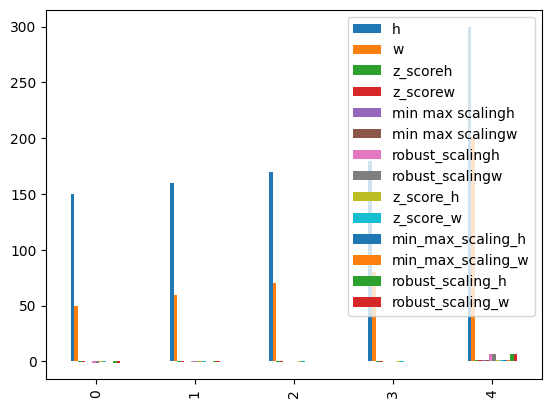

In [95]:
df.plot(kind="bar")